<a href="https://colab.research.google.com/github/nikishkaaa/Intelligent_data_analysis-UNI/blob/main/IAD_lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opendatasets --upgrade --quiet

In [20]:
import pandas as pd
import numpy as np
import os
import opendatasets as od
from sklearn.neighbors import KNeighborsClassifier
from process_bank_churn import preprocess_data
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA

In [5]:
dataset_url = 'https://www.kaggle.com/competitions/bank-customer-churn-prediction-dlu/data'
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: darianikishkina
Your Kaggle Key: ··········


100%|██████████| 637k/637k [00:00<00:00, 50.7MB/s]


Extracting archive ./bank-customer-churn-prediction-dlu/bank-customer-churn-prediction-dlu.zip to ./bank-customer-churn-prediction-dlu


In [6]:
df = pd.read_csv('./bank-customer-churn-prediction-dlu/train.csv')
df.head(5)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15779985.0,Nwankwo,678.0,France,Male,29.0,4.0,0.00,3.0,1.0,0.0,180626.36,0.0
1,1,15650086.0,Ch'in,687.0,France,Female,34.0,1.0,0.00,2.0,0.0,1.0,63736.17,0.0
2,2,15733602.0,Thompson,682.0,France,Female,52.0,6.0,0.00,3.0,0.0,0.0,179655.87,1.0
3,3,15645794.0,Macleod,753.0,Germany,Male,44.0,6.0,83347.25,2.0,1.0,0.0,161407.48,0.0
4,4,15633840.0,Hsia,544.0,Germany,Female,55.0,0.0,107747.57,1.0,1.0,0.0,176580.86,1.0


In [7]:
numeric_cols = [
 'Age',
 'Balance',
 'CreditScore',
 'IsActiveMember',
 'EstimatedSalary']
categorical_cols = ['Geography', 'Gender','NumOfProducts' ]

In [8]:
data =  preprocess_data(df, 'Exited', scaler_numeric=True, categorical_cols=categorical_cols,numeric_cols = numeric_cols)
X_train = data['X_train']
train_targets = data['train_targets']
X_val = data['X_val']
val_targets = data['val_targets']

In [9]:
knn = KNeighborsClassifier()
knn.fit(X_train, train_targets)
train_preds = knn.predict(X_train)
test_preds = knn.predict(X_val)

print("Train ROC AUC", roc_auc_score(train_targets, train_preds))
print("Val ROC AUC", roc_auc_score(val_targets, test_preds))

Train ROC AUC 0.8401217087657766
Val ROC AUC 0.7822038548597298


Висновок: модель працює добре. Різниця між ROC AUC на тренувальному і валідаційному наборі невелика, отже модель добре генералізується на нових данних

In [13]:
X_train

,Age,Balance,CreditScore,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,NumOfProducts_1.0,NumOfProducts_2.0,NumOfProducts_3.0,NumOfProducts_4.0
7180,0.214286,0.626382,0.599045,1.0,0.719772,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
10393,0.375000,0.848836,0.603819,0.0,0.727603,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
80,0.303571,0.554522,0.653938,0.0,0.872180,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3365,0.714286,0.000000,0.568019,1.0,0.257797,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
12236,0.053571,0.000000,0.658711,1.0,0.742837,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9493,0.267857,0.000000,0.482100,0.0,0.617686,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
8463,0.392857,0.000000,0.577566,1.0,0.239129,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
8143,0.196429,0.000000,0.453461,1.0,0.667682,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
11512,0.428571,0.000000,0.379475,0.0,0.363197,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


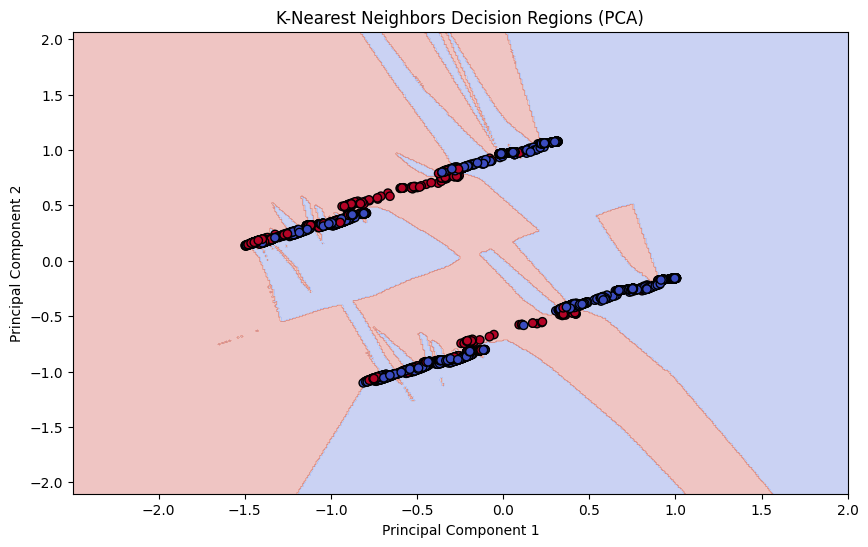

In [22]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)


knn_pca = KNeighborsClassifier()
knn_pca.fit(X_train_pca, train_targets)

x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))


Z = knn_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=train_targets, edgecolor='k', cmap=plt.cm.coolwarm)
plt.title('K-Nearest Neighbors Decision Regions (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

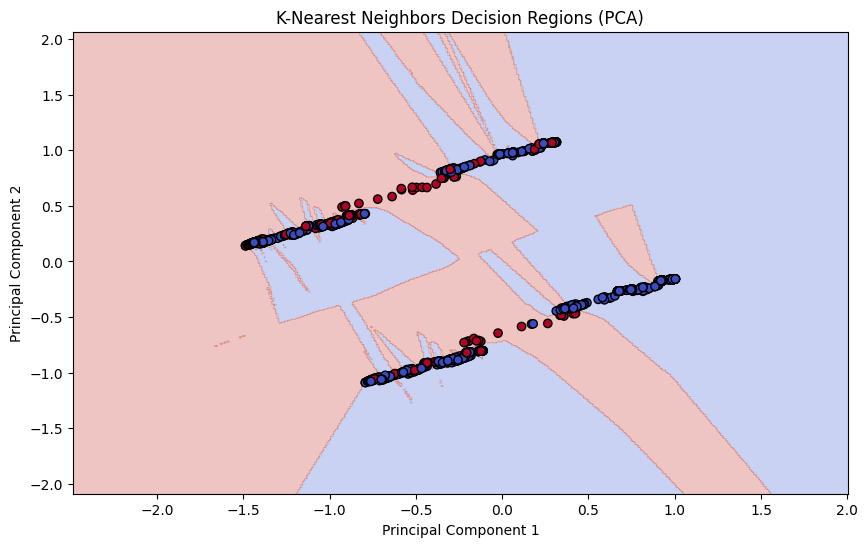

In [23]:
X_test_pca = pca.transform(X_val)

x_min, x_max = X_test_pca[:, 0].min() - 1, X_test_pca[:, 0].max() + 1
y_min, y_max = X_test_pca[:, 1].min() - 1, X_test_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))


Z = knn_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=val_targets, edgecolor='k', cmap=plt.cm.coolwarm)
plt.title('K-Nearest Neighbors Decision Regions (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Висновок: з візуалізації роботи алгоритму бачимо, що KNN добре класифікує точки, але є і помилки

#### Пошук кращих параметрів за допомогю GridSearchCV

In [24]:
param_grid = {
    'n_neighbors': [2, 3, 4, 5, 6, 7, 9, 10, 12],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}


def grid_search(param_grid, estimator):
        grid_search = GridSearchCV(estimator=estimator, param_grid=param_grid,
                                  scoring='roc_auc', cv=5, verbose=0, n_jobs=-1)

        grid_search.fit(X_train, train_targets)
        best = grid_search.best_estimator_
        best_predictions_train = best.predict(X_train)
        best_predictions_test = best.predict(X_val)

        print("Best params: ", grid_search.best_params_)
        print("Best AUROC for Train: ", roc_auc_score(train_targets, best_predictions_train ))
        print("Best AUROC for Test: ", roc_auc_score(val_targets, best_predictions_test))
        return best
grid_search(param_grid, knn)

Best params:  {'metric': 'manhattan', 'n_neighbors': 12, 'weights': 'uniform'}
Best AUROC for Train:  0.7984814552611164
Best AUROC for Test:  0.7685986693188833


KNeighborsClassifier(metric='manhattan', n_neighbors=12)

Висновок: за допомогою GridSearchCV не знайдемо кращих параметрів

#### Пошук кращих параметрів за допомогою RandomSearch

In [32]:
random_search = RandomizedSearchCV(estimator=knn, param_distributions=param_grid,
                                              n_iter=40, scoring='roc_auc', cv=3, verbose=2, n_jobs=-1, random_state=42)
random_search.fit(X_train, train_targets)
best = random_search.best_estimator_
best_predictions_train = best.predict(X_train)
best_predictions_test = best.predict(X_val)

print("Best params: ", random_search.best_params_)
print("Best AUROC for Train: ", roc_auc_score(train_targets, best_predictions_train ))
print("Best AUROC for Test: ", roc_auc_score(val_targets, best_predictions_test))

Fitting 3 folds for each of 36 candidates, totalling 108 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 36 is smaller than n_iter=40. Running 36 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best params:  {'weights': 'distance', 'n_neighbors': 12, 'metric': 'manhattan'}
Best AUROC for Train:  1.0
Best AUROC for Test:  0.7871733315042184


Висновок: за допомогою RandomSearch знайдемо параметри, які дають кращий скор метрики на валідаційному наборі даних. Хоча різніця з моделлю "з коробки" невелика 0.01

In [27]:
data_dir = './bank-customer-churn-prediction-dlu'
test_csv = data_dir + '/test.csv'
test_raw_df = pd.read_csv(test_csv)
test_raw_df

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,15000,15594796.0,Chu,584.0,Germany,Male,30.0,2.0,146053.66,1.0,1.0,1.0,157891.86
1,15001,15642821.0,Mazzi,551.0,France,Male,39.0,5.0,0.00,2.0,1.0,1.0,67431.28
2,15002,15716284.0,Onyekachi,706.0,France,Male,43.0,8.0,0.00,2.0,1.0,0.0,156768.45
3,15003,15785078.0,Martin,717.0,Spain,Male,45.0,3.0,0.00,1.0,1.0,1.0,166909.87
4,15004,15662955.0,Kenechukwu,592.0,Spain,Male,43.0,8.0,0.00,2.0,1.0,1.0,143681.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,24995,15642997.0,Chukwumaobim,639.0,Spain,Male,38.0,10.0,0.00,2.0,1.0,1.0,49637.65
9996,24996,15739271.0,Clements,678.0,Spain,Male,39.0,9.0,0.00,2.0,1.0,1.0,142513.50
9997,24997,15756743.0,Chidiebere,774.0,France,Male,30.0,9.0,0.00,2.0,1.0,0.0,4861.72
9998,24998,15680167.0,Yermakova,595.0,France,Male,38.0,6.0,144875.79,1.0,1.0,0.0,126469.09


In [ ]:
from process_bank_churn import preprocess_new_data

In [33]:
new_data = preprocess_new_data(test_raw_df, data['preprocessor'])
y_pred_proba = best.predict_proba(new_data)[:, 1]

In [34]:
test_raw_df['Exited'] = y_pred_proba

In [35]:
sample_submission = pd.read_csv('bank-customer-churn-prediction-dlu/sample_submission.csv')
sample_submission.head(5)

,id,Exited
0,15000,0.5
1,15001,0.5
2,15002,0.5
3,15003,0.5
4,15004,0.5


In [36]:
merged_df = sample_submission.merge(test_raw_df, on='id', how='left')
merged_df.head(5)

,id,Exited_x,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited_y
0,15000,0.5,15594796.0,Chu,584.0,Germany,Male,30.0,2.0,146053.66,1.0,1.0,1.0,157891.86,0.156754
1,15001,0.5,15642821.0,Mazzi,551.0,France,Male,39.0,5.0,0.00,2.0,1.0,1.0,67431.28,0.000000
2,15002,0.5,15716284.0,Onyekachi,706.0,France,Male,43.0,8.0,0.00,2.0,1.0,0.0,156768.45,0.000000
3,15003,0.5,15785078.0,Martin,717.0,Spain,Male,45.0,3.0,0.00,1.0,1.0,1.0,166909.87,0.350916
4,15004,0.5,15662955.0,Kenechukwu,592.0,Spain,Male,43.0,8.0,0.00,2.0,1.0,1.0,143681.97,0.070863


In [37]:
merged_df['Exited'] = merged_df['Exited_y']
merged_df = merged_df[['id', 'Exited']]

In [38]:
merged_df.to_csv('submission_knn_lab7.csv', index=False)

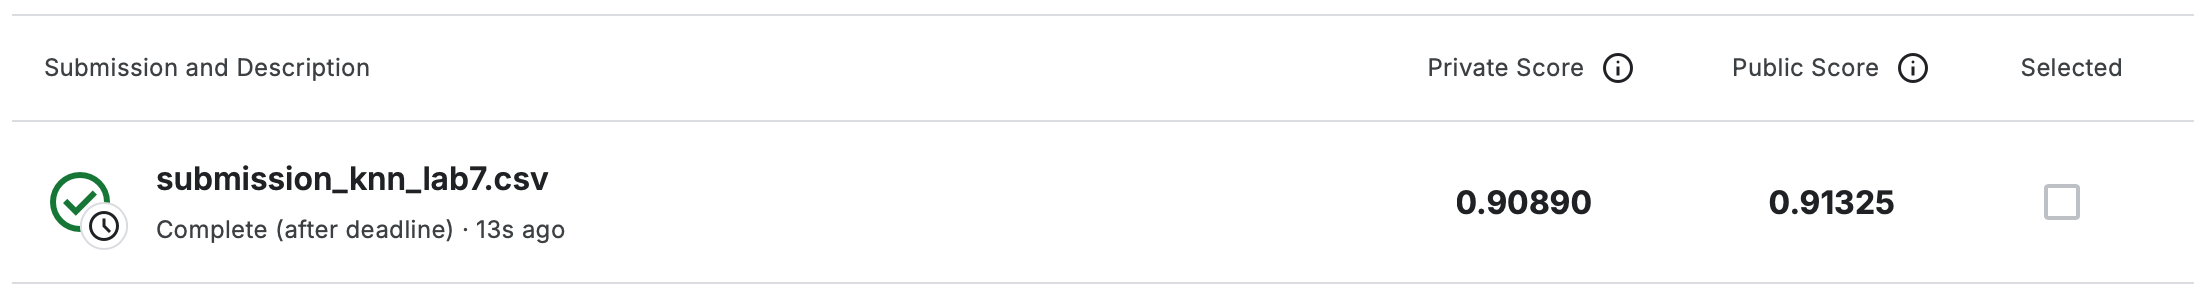